In [1]:
from h20 import H2OMLAgentEnhanced

In [2]:
import os

from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

import pandas as pd
from langchain_openai import ChatOpenAI
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Import your H2O ML Agent (assuming it's saved as h2o_ml_agent_enhanced.py)
from h20 import H2OMLAgentEnhanced

# Check for OpenAI API key
if not os.getenv("OPENAI_API_KEY"):
    print("❌ Error: OPENAI_API_KEY environment variable is not set!")
    print("Please set your OpenAI API key by running one of these commands:")
    print("  export OPENAI_API_KEY='your-api-key-here'")
    print("  or")
    print("  OPENAI_API_KEY='your-api-key-here' python script.py")
    print("\nYou can get an API key from: https://platform.openai.com/api-keys")
    exit(1)

# 1. Set up the language model
llm = ChatOpenAI(
    model="gpt-4o-mini", temperature=0.1  # or "gpt-4" for better performance
)

# This was ADDED to h20.py:
AGENT_NAME = "h2o_ml_agent_enhanced"

# 2. Create or Load your dataset
# Option A: Create sample data
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42,
)

# Convert to DataFrame
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Option B: Load your own data
# df = pd.read_csv("your_data.csv")
# X = df.drop(columns=["target"])  # Replace "target" with your target column
# y = df["target"]

# 3. Split the data into train/test/calibration sets
X = df.drop(columns=["target"])
y = df["target"]

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: separate calibration set from remaining data (25% of temp = 20% of total)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Calibration set size: {len(X_calib)}")

# 4. Set up directories
LOG_PATH = "logs/"
MODEL_PATH = "models/"
os.makedirs(LOG_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)

# 5. Initialize the H2O ML Agent
ml_agent = H2OMLAgentEnhanced(
    model=llm,
    log=True,
    log_path=LOG_PATH,
    model_directory=MODEL_PATH,
    n_samples=30,
    file_name="h2o_automl_enhanced.py",
    function_name="h2o_automl_enhanced",
    overwrite=True,
    human_in_the_loop=False,  # Set to True if you want to review steps
    bypass_recommended_steps=False,  # Set to True to skip recommendation step
    bypass_explain_code=False,  # Set to True to skip code explanation
    enable_mlflow=False,  # Set to True to enable MLflow logging
    mlflow_tracking_uri=None,
    mlflow_experiment_name="H2O AutoML Enhanced Experiment",
    mlflow_run_name="test_run_1",
    enable_optuna=True,  # Enable Optuna optimization
    optuna_n_trials=20,  # Number of optimization trials
    optuna_timeout=300,  # Timeout in seconds
)

# 6. Run the agent
print("Starting H2O ML Agent Enhanced...")

Train set size: 600
Test set size: 200
Calibration set size: 200
Starting H2O ML Agent Enhanced...


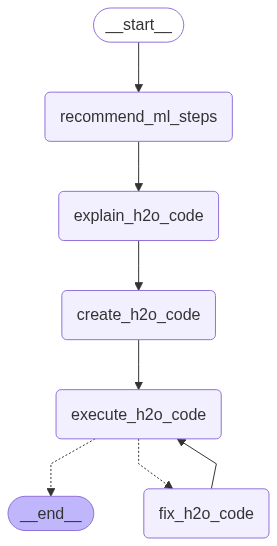

In [3]:
ml_agent._compiled_graph

In [4]:
# --- NEW, DETAILED INSTRUCTIONS ---
# These instructions tell the agent to create a custom model in addition to the H2O run.

user_instructions_with_custom_model = """
Your primary task is to create and run an H2O AutoML model for binary classification,
optimizing for AUC. Use the provided train, test, and calibration sets.

IN ADDITION to the H2O models, you must also perform the following steps:
1.  Import `LogisticRegression` from `sklearn.linear_model` and `CalibratedClassifierCV` from `sklearn.calibration`.
2.  Train a standard `LogisticRegression` model using the training data (`train_data`).
3.  Use the `CalibratedClassifierCV` to calibrate this logistic regression model using the calibration data (`calib_data`). Use the 'isotonic' method.
4.  The final result of your work must be a dictionary. The H2O AutoML results should be returned as usual.
5.  Crucially, you must add a key named 'custom_models' to the final results dictionary. This key's value should be another dictionary containing your calibrated custom model.
    It should look like this:
    'custom_models': {
        'Calibrated_Logistic_Regression': your_trained_calibrated_model_object
    }
"""

# Now, run the agent with these new instructions
ml_agent.invoke_agent(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    X_calib=X_calib,
    y_calib=y_calib,
    user_instructions=user_instructions_with_custom_model,  # <-- Use the new instructions
    max_retries=2,
)

---H2O ML AGENT ENHANCED----
    * RECOMMEND MACHINE LEARNING STEPS
---H2O ML AGENT ENHANCED----
    * EXPLAINING ENHANCED H2O AUTOML CODE
    * CREATE ENHANCED H2O AUTOML CODE WITH OPTUNA
DEBUG: code_prompt_template type: <class 'str'>

DEBUG: recommended_steps type: <class 'str'>
DEBUG: state keys: dict_keys(['messages', 'user_instructions', 'recommended_steps', 'train_data', 'test_data', 'calib_data', 'target_variable', 'feature_columns', 'leaderboard', 'best_model_id', 'model_path', 'model_results', 'optimization_results', 'test_metrics', 'calibration_metrics', 'all_datasets_summary', 'h2o_train_function', 'h2o_train_function_path', 'h2o_train_file_name', 'h2o_train_function_name', 'h2o_train_error', 'max_retries', 'retry_count'])
DEBUG: Final recommended_steps type: <class 'str'>
Syntax error detected: invalid syntax (<unknown>, line 33)
Could not fix syntax errors, using fallback code
      File saved to: logs/h2o_automl_enhanced.py
    * EXECUTING GENERATED CODE
Executing functi

H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_shankii_idtrsg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
12:49:06.785: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████|

[I 2025-06-23 12:57:40,706] A new study created in memory with name: no-name-1d9439d0-d455-4c7d-87c8-b42e6db8ce7d
[I 2025-06-23 12:57:40,815] Trial 0 finished with value: 0.974997499749975 and parameters: {'n_estimators': 98, 'max_depth': 11, 'min_samples_split': 2}. Best is trial 0 with value: 0.974997499749975.
[I 2025-06-23 12:57:40,929] Trial 1 finished with value: 0.9702970297029703 and parameters: {'n_estimators': 117, 'max_depth': 8, 'min_samples_split': 8}. Best is trial 0 with value: 0.974997499749975.
[I 2025-06-23 12:57:40,990] Trial 2 finished with value: 0.9682968296829684 and parameters: {'n_estimators': 62, 'max_depth': 15, 'min_samples_split': 9}. Best is trial 0 with value: 0.974997499749975.
[I 2025-06-23 12:57:41,106] Trial 3 finished with value: 0.9050905090509052 and parameters: {'n_estimators': 195, 'max_depth': 2, 'min_samples_split': 9}. Best is trial 0 with value: 0.974997499749975.
[I 2025-06-23 12:57:41,211] Trial 4 finished with value: 0.9265926592659266 and

[LightGBM] [Info] Number of positive: 301, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4008
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501667 -> initscore=0.006667
[LightGBM] [Info] Start training from score 0.006667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-06-23 12:57:45,769] Trial 1 finished with value: 0.9407940794079408 and parameters: {'n_estimators': 85, 'max_depth': 2, 'learning_rate': 0.06481199748428892, 'subsample': 0.7314900136995581, 'colsample_bytree': 0.5910711209036805}. Best is trial 0 with value: 0.9793979397939794.
[I 2025-06-23 12:57:45,886] Trial 2 finished with value: 0.9757975797579758 and parameters: {'n_estimators': 80, 'max_depth': 7, 'learning_rate': 0.1787354383668159, 'subsample': 0.6357350937850824, 'colsample_bytree': 0.6050570879668056}. Best is trial 0 with value: 0.9793979397939794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:46,191] Trial 3 finished with value: 0.9786978697869786 and parameters: {'n_estimators': 181, 'max_depth': 14, 'learning_rate': 0.14526902561832547, 'subsample': 0.6486718522906236, 'colsample_bytree': 0.6776820302115796}. Best is trial 0 with value: 0.9793979397939794.
[I 2025-06-23 12:57:46,283] Trial 4 finished with value: 0.9772977297729772 and parameters: {'n_estimators': 54, 'max_depth': 14, 'learning_rate': 0.29601916627472485, 'subsample': 0.7150527830724125, 'colsample_bytree': 0.9005774100914354}. Best is trial 0 with value: 0.9793979397939794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:46,430] Trial 5 finished with value: 0.9762976297629762 and parameters: {'n_estimators': 90, 'max_depth': 15, 'learning_rate': 0.17852109087907028, 'subsample': 0.6595176135328089, 'colsample_bytree': 0.8285627980056743}. Best is trial 0 with value: 0.9793979397939794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:46,620] Trial 6 finished with value: 0.976097609760976 and parameters: {'n_estimators': 177, 'max_depth': 13, 'learning_rate': 0.21903476562018132, 'subsample': 0.828920234549728, 'colsample_bytree': 0.6380026463443752}. Best is trial 0 with value: 0.9793979397939794.
[I 2025-06-23 12:57:46,743] Trial 7 finished with value: 0.9765976597659765 and parameters: {'n_estimators': 77, 'max_depth': 12, 'learning_rate': 0.29675649079598365, 'subsample': 0.7804712187718641, 'colsample_bytree': 0.6813424945883043}. Best is trial 0 with value: 0.9793979397939794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:46,806] Trial 8 finished with value: 0.9787978797879787 and parameters: {'n_estimators': 70, 'max_depth': 5, 'learning_rate': 0.18170594140869523, 'subsample': 0.5663729587327457, 'colsample_bytree': 0.7182765572825602}. Best is trial 0 with value: 0.9793979397939794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:47,082] Trial 9 finished with value: 0.9756975697569756 and parameters: {'n_estimators': 181, 'max_depth': 15, 'learning_rate': 0.04332971234092703, 'subsample': 0.932316058190592, 'colsample_bytree': 0.5894135388055194}. Best is trial 0 with value: 0.9793979397939794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:47,277] A new study created in memory with name: no-name-f2ec15c2-c3f0-4c73-a308-2831b07e1e4a
[I 2025-06-23 12:57:47,302] Trial 0 finished with value: 0.8877887788778878 and parameters: {'C': 0.7274936614728494}. Best is trial 0 with value: 0.8877887788778878.
[I 2025-06-23 12:57:47,310] Trial 1 finished with value: 0.8884888488848885 and parameters: {'C': 0.1449239350992912}. Best is trial 1 with value: 0.8884888488848885.
[I 2025-06-23 12:57:47,327] Trial 2 finished with value: 0.8877887788778878 and parameters: {'C': 0.4560041627167634}. Best is trial 1 with value: 0.8884888488848885.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 12:57:47,375] Trial 3 finished with value: 0.8878887888788879 and parameters: {'C': 2.552612875287913}. Best is trial 1 with value: 0.8884888488848885.
[I 2025-06-23 12:57:47,383] Trial 4 finished with value: 0.8877887788778878 and parameters: {'C': 0.1069477893779265}. Best is trial 1 with value: 0.8884888488848885.
[I 2025-06-23 12:57:47,386] Trial 5 finished with value: 0.8678867886788679 and parameters: {'C': 0.022328873236408472}. Best is trial 1 with value: 0.8884888488848885.
[I 2025-06-23 12:57:47,401] Trial 6 finished with value: 0.8877887788778878 and parameters: {'C': 0.356878275110314}. Best is trial 1 with value: 0.8884888488848885.
[I 2025-06-23 12:57:47,465] Trial 7 finished with value: 0.8874887488748875 and parameters: {'C': 4.883852894616388}. Best is trial 1 with value: 0.8884888488848885.
[I 2025-06-23 12:57:47,484] Trial 8 finished with value: 0.8875887588758876 and parameters: {'C': 8.620544380603448}. Best is trial 1 with value: 0.8884888488848885.


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
No custom models found in agent response. Run the agent first.


{'messages': [AIMessage(content='H2O AutoML code explanation completed', additional_kwargs={}, response_metadata={}, role='H2OAgent')],
 'user_instructions': "\nYour primary task is to create and run an H2O AutoML model for binary classification,\noptimizing for AUC. Use the provided train, test, and calibration sets.\n\nIN ADDITION to the H2O models, you must also perform the following steps:\n1.  Import `LogisticRegression` from `sklearn.linear_model` and `CalibratedClassifierCV` from `sklearn.calibration`.\n2.  Train a standard `LogisticRegression` model using the training data (`train_data`).\n3.  Use the `CalibratedClassifierCV` to calibrate this logistic regression model using the calibration data (`calib_data`). Use the 'isotonic' method.\n4.  The final result of your work must be a dictionary. The H2O AutoML results should be returned as usual.\n5.  Crucially, you must add a key named 'custom_models' to the final results dictionary. This key's value should be another dictionary

In [9]:
# ml_agent.plot_custom_models_reliability_curves()

In [5]:
# ml_agent.get_leaderboard()

In [6]:
# import h2o

# model = h2o.get_model(ml_agent.get_best_model_id())

# model